In [ ]:
import pandas as pd
df = pd.read_csv("/content/yf.csv")
df.head()

,From Date_To Date,PM2.5,PM10,NO2,SO2,Ozone,CO,AQI
0,01-01-2024 12:00 02-01-2024 12:00,26.81,85.88,21.60,11.10,24.76,0.91,83
1,02-01-2024 12:00 03-01-2024 12:00,33.13,74.63,30.00,9.26,28.22,0.79,96
2,03-01-2024 12:00 04-01-2024 12:00,31.55,72.00,23.09,8.67,32.09,1.06,93
3,04-01-2024 12:00 05-01-2024 12:00,31.57,67.99,33.37,8.69,23.85,0.80,93
4,05-01-2024 12:00 06-01-2024 12:00,24.47,56.23,19.55,8.72,29.52,0.95,78


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/yf.csv')

# Handling missing values
X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'Ozone', 'CO']]
y = df['AQI']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline to handle missing values and fit the model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred_rf = pipeline.predict(X_test)

# Evaluation metrics for Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)


Random Forest Regressor Evaluation Metrics:
Mean Absolute Error (MAE): 1.1022222222222209
Mean Squared Error (MSE): 1.9196555555555541
Root Mean Squared Error (RMSE): 1.3855163497972711
R-squared (R2): 0.992722451558551


**K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds
k = 5

# Create a k-fold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert scores to positive values
cv_scores = -cv_scores

# Compute the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Cross-Validation Mean Squared Error:", mean_cv_score)
print("Cross-Validation Standard Deviation:", std_cv_score)


Cross-Validation Mean Squared Error: 4.2567712925157855
Cross-Validation Standard Deviation: 2.4904240437408895


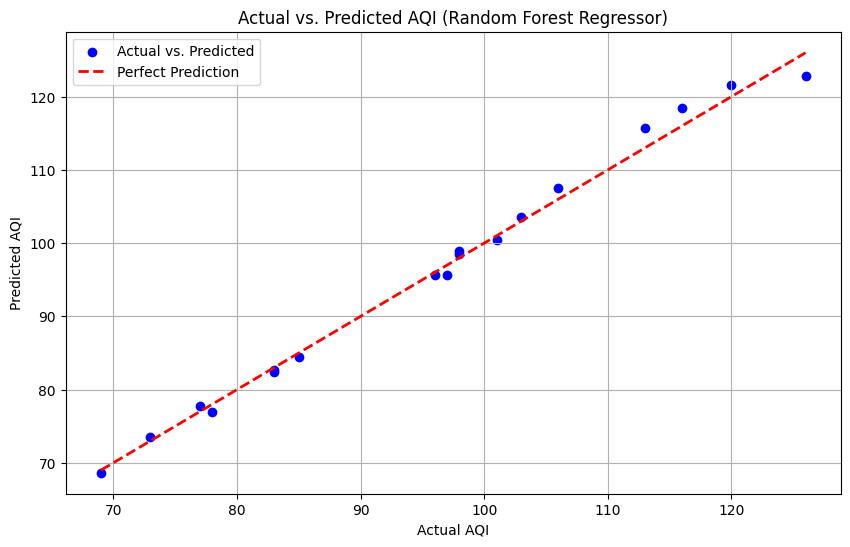

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs. Predicted AQI (Random Forest Regressor)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# Multiple Linear Regression
lr_model = LinearRegression()
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('regressor', lr_model)
])

pipeline.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

# Evaluation metrics for Multiple Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nMultiple Linear Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_lr)
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("R-squared (R2):", r2_lr)



Multiple Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 1.2645534408868753
Mean Squared Error (MSE): 2.1586804880854618
Root Mean Squared Error (RMSE): 1.4692448700218292
R-squared (R2): 0.991816291325708


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the number of folds
k = 5  # You can adjust the number of folds as needed

# Define the pipeline
lr_model = LinearRegression()
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('regressor', lr_model)
])

# Create a k-fold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert scores to positive values
cv_scores = -cv_scores

# Compute the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Cross-Validation Mean Squared Error:", mean_cv_score)
print("Cross-Validation Standard Deviation:", std_cv_score)


Cross-Validation Mean Squared Error: 4.2567712925157855
Cross-Validation Standard Deviation: 2.4904240437408895


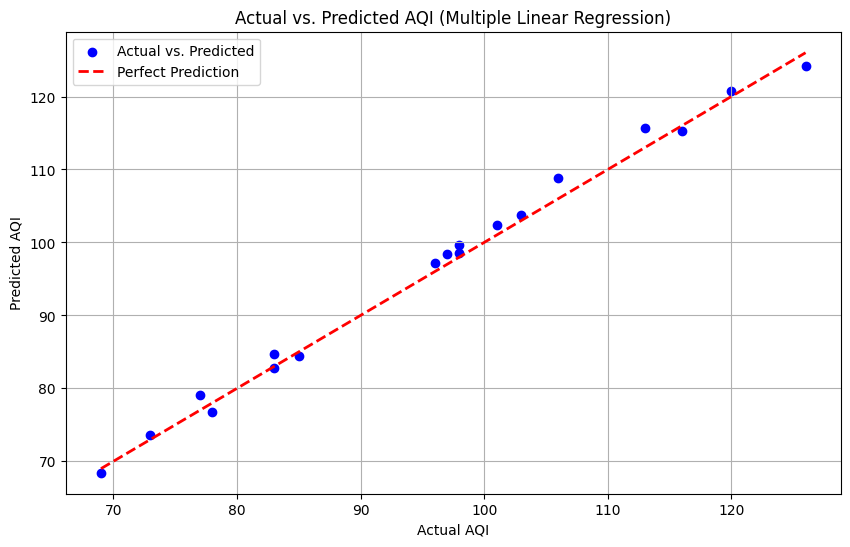

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs. Predicted AQI (Multiple Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()
